In [ ]:

import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/sample_data/archive (14).zip')

In [ ]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [ ]:
df.isnull().sum()

,0
Month,0
Sales,0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

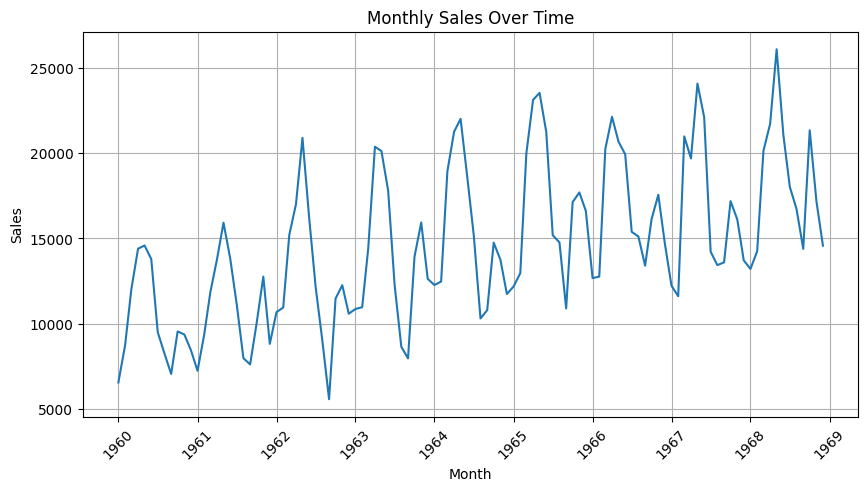

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df['Month_sin'] = np.sin(2*np.pi*df['Month_Num']/12)
df['Month_cos'] = np.cos(2*np.pi*df['Month_Num']/12)

In [ ]:
df['Sales_lag1'] = df['Sales'].shift(1)
df['Sales_lag2'] = df['Sales'].shift(2)

In [ ]:
df = df.dropna()

In [ ]:

features = ['Year', 'Month_sin', 'Month_cos', 'Sales_lag1', 'Sales_lag2']
X = df[features]
y = df['Sales']

In [ ]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10435612.715238571


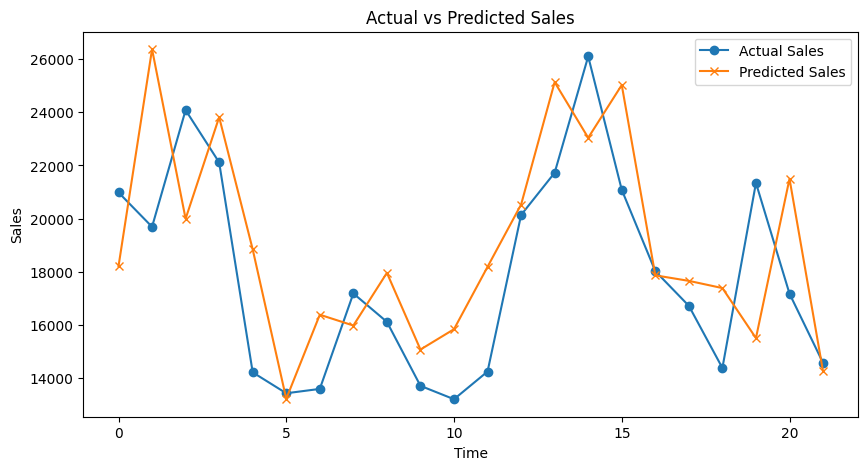

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
